In [1]:
%matplotlib inline

In [4]:
import numpy as np

import h5py
import pprint
import time
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as T

In [5]:
def show_random_image(train_ds, class_list=None):
    num = torch.randint(low=0, high=len(train_ds), size=(1,)).item()

    image, label = train_ds[num]
    image = image.numpy().transpose((1, 2, 0))
        
    if class_list:
        label = class_list[label]
        
    plt.title(label)
    plt.imshow(image)

In [6]:
def get_size(data):
    image, _ = data
    channels, height, width = image.shape
    return {'channels': channels, 'height': height, 'width': width}

In [7]:
cifar100_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
                  'bed', 'bee', 'beetle', 'bicycle', 'bottle',
                  'bowl', 'boy', 'bridge', 'bus', 'butterfly',
                  'camel', 'can', 'castle', 'caterpillar', 'cattle',
                  'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
                  'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                  'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
                  'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
                  'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
                  'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
                  'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
                  'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
                  'plain', 'plate', 'poppy', 'porcupine', 'possum',
                  'rabbit', 'raccoon', 'ray', 'road', 'rocket',
                  'rose', 'sea', 'seal', 'shark', 'shrew',
                  'skunk', 'skyscraper', 'snail', 'snake', 'spider',
                  'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
                  'tank', 'telephone', 'television', 'tiger', 'tractor',
                  'train', 'trout', 'tulip', 'turtle', 'wardrobe',
                  'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [8]:
cifar100_train_ds = torchvision.datasets.CIFAR100(root='../data',
                                       train=True,
                                       transform=T.ToTensor(),
                                       download=True)

169001984it [00:05, 29812807.05it/s]                                                                                    


Extracting ../data/cifar-100-python.tar.gz to ../data


In [9]:
get_size(cifar100_train_ds[10])

{'channels': 3, 'height': 32, 'width': 32}

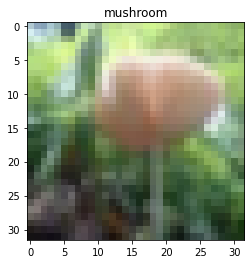

In [10]:
show_random_image(cifar100_train_ds, class_list=cifar100_names)

In [11]:
fashionmnist_train_ds = torchvision.datasets.FashionMNIST(root='../data',
                                                          train=True,
                                                          transform=T.ToTensor(),
                                                          download=True)

In [12]:
fmnist_classes = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

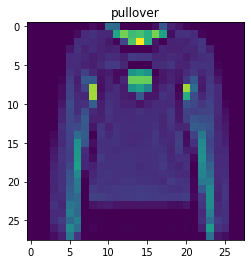

In [13]:
show_random_image(fashionmnist_train_ds, fmnist_classes)

In [14]:
country211_train_ds = torchvision.datasets.Country211(root='../data',
                                                      split='train',
                                                      transform=T.ToTensor(),
                                                      download=True)

  2%|█                                                            | 190496768/11000241947 [00:06<06:25, 28009142.81it/s]


KeyboardInterrupt: 

In [73]:
country_list = classes = [
    'Andorra',
    'United Arab Emirates',
    'Afghanistan',
    'Antigua and Barbuda',
    'Anguilla',
    'Albania',
    'Armenia',
    'Angola',
    'Antarctica',
    'Argentina',
    'Austria',
    'Australia',
    'Aruba',
    'Aland Islands',
    'Azerbaijan',
    'Bosnia and Herzegovina',
    'Barbados',
    'Bangladesh',
    'Belgium',
    'Burkina Faso',
    'Bulgaria',
    'Bahrain',
    'Benin',
    'Bermuda',
    'Brunei Darussalam',
    'Bolivia',
    'Bonaire, Saint Eustatius and Saba',
    'Brazil',
    'Bahamas',
    'Bhutan',
    'Botswana',
    'Belarus',
    'Belize',
    'Canada',
    'DR Congo',
    'Central African Republic',
    'Switzerland',
    "Cote d'Ivoire",
    'Cook Islands',
    'Chile',
    'Cameroon',
    'China',
    'Colombia',
    'Costa Rica',
    'Cuba',
    'Cabo Verde',
    'Curacao',
    'Cyprus',
    'Czech Republic',
    'Germany',
    'Denmark',
    'Dominica',
    'Dominican Republic',
    'Algeria',
    'Ecuador',
    'Estonia',
    'Egypt',
    'Spain',
    'Ethiopia',
    'Finland',
    'Fiji',
    'Falkland Islands',
    'Faeroe Islands',
    'France',
    'Gabon',
    'United Kingdom',
    'Grenada',
    'Georgia',
    'French Guiana',
    'Guernsey',
    'Ghana',
    'Gibraltar',
    'Greenland',
    'Gambia',
    'Guadeloupe',
    'Greece',
    'South Georgia and South Sandwich Is.',
    'Guatemala',
    'Guam',
    'Guyana',
    'Hong Kong',
    'Honduras',
    'Croatia',
    'Haiti',
    'Hungary',
    'Indonesia',
    'Ireland',
    'Israel',
    'Isle of Man',
    'India',
    'Iraq',
    'Iran',
    'Iceland',
    'Italy',
    'Jersey',
    'Jamaica',
    'Jordan',
    'Japan',
    'Kenya',
    'Kyrgyz Republic',
    'Cambodia',
    'St. Kitts and Nevis',
    'North Korea',
    'South Korea',
    'Kuwait',
    'Cayman Islands',
    'Kazakhstan',
    'Laos',
    'Lebanon',
    'St. Lucia',
    'Liechtenstein',
    'Sri Lanka',
    'Liberia',
    'Lithuania',
    'Luxembourg',
    'Latvia',
    'Libya',
    'Morocco',
    'Monaco',
    'Moldova',
    'Montenegro',
    'Saint-Martin',
    'Madagascar',
    'Macedonia',
    'Mali',
    'Myanmar',
    'Mongolia',
    'Macau',
    'Martinique',
    'Mauritania',
    'Malta',
    'Mauritius',
    'Maldives',
    'Malawi',
    'Mexico',
    'Malaysia',
    'Mozambique',
    'Namibia',
    'New Caledonia',
    'Nigeria',
    'Nicaragua',
    'Netherlands',
    'Norway',
    'Nepal',
    'New Zealand',
    'Oman',
    'Panama',
    'Peru',
    'French Polynesia',
    'Papua New Guinea',
    'Philippines',
    'Pakistan',
    'Poland',
    'Puerto Rico',
    'Palestine',
    'Portugal',
    'Palau',
    'Paraguay',
    'Qatar',
    'Reunion',
    'Romania',
    'Serbia',
    'Russia',
    'Rwanda',
    'Saudi Arabia',
    'Solomon Islands',
    'Seychelles',
    'Sudan',
    'Sweden',
    'Singapore',
    'St. Helena',
    'Slovenia',
    'Svalbard and Jan Mayen Islands',
    'Slovakia',
    'Sierra Leone',
    'San Marino',
    'Senegal',
    'Somalia',
    'South Sudan',
    'El Salvador',
    'Sint Maarten',
    'Syria',
    'Eswatini',
    'Togo',
    'Thailand',
    'Tajikistan',
    'Timor-Leste',
    'Turkmenistan',
    'Tunisia',
    'Tonga',
    'Turkey',
    'Trinidad and Tobago',
    'Taiwan',
    'Tanzania',
    'Ukraine',
    'Uganda',
    'United States',
    'Uruguay',
    'Uzbekistan',
    'Vatican',
    'Venezuela',
    'British Virgin Islands',
    'United States Virgin Islands',
    'Vietnam',
    'Vanuatu',
    'Samoa',
    'Kosovo',
    'Yemen',
    'South Africa',
    'Zambia',
    'Zimbabwe',
]

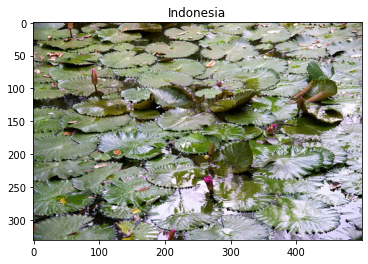

In [77]:
show_random_image(country211_train_ds, country_list)

In [197]:
get_size(country211_train_ds[1])

{'channels': 3, 'height': 499, 'width': 333}

In [95]:
aircraft_train_ds = torchvision.datasets.FGVCAircraft(root='../data',
                                                      split='train',
                                                      annotation_level='family',
                                                      transform=T.ToTensor(),
                                                      download=True)

2753340416it [02:52, 15932210.75it/s]                                                                                   


Extracting ./data/fgvc-aircraft-2013b.tar.gz to ./data


In [100]:
airplane_list = ['A300', 'A310', 'A320', 'A330', 'A340', 'A380', 'ATR-42',
                 'ATR-72', 'An-12', 'BAE 146', 'BAE-125', 'Beechcraft 1900',
                 'Boeing 707', 'Boeing 717', 'Boeing 727', 'Boeing 737',
                 'Boeing 747', 'Boeing 757', 'Boeing 767', 'Boeing 777',
                 'C-130', 'C-47', 'CRJ-200', 'CRJ-700', 'Cessna 172',
                 'Cessna 208', 'Cessna Citation', 'Challenger 600',
                 'DC-10', 'DC-3', 'DC-6', 'DC-8', 'DC-9', 'DH-82',
                 'DHC-1', 'DHC-6', 'DR-400', 'Dash 8', 'Dornier 328',
                 'EMB-120', 'Embraer E-Jet', 'Embraer ERJ 145',
                 'Embraer Legacy 600', 'Eurofighter Typhoon', 'F-16',
                 'F/A-18', 'Falcon 2000', 'Falcon 900', 'Fokker 100',
                 'Fokker 50', 'Fokker 70', 'Global Express', 'Gulfstream',
                 'Hawk T1', 'Il-76', 'King Air', 'L-1011', 'MD-11',
                 'MD-80', 'MD-90', 'Metroliner', 'PA-28', 'SR-20',
                 'Saab 2000', 'Saab 340', 'Spitfire', 'Tornado',
                 'Tu-134', 'Tu-154', 'Yak-42']

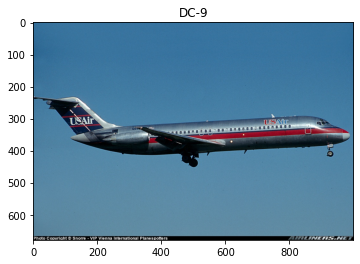

In [195]:
show_random_image(aircraft_train_ds, airplane_list)

In [196]:
get_size(aircraft_train_ds[0])

{'channels': 3, 'height': 695, 'width': 1024}

In [15]:
eurosat_train_ds = torchvision.datasets.EuroSAT(root='../data',
                                                transform=T.ToTensor(),
                                                download=True)

94280704it [00:07, 12928247.20it/s]                                                                                     


Extracting ../data/eurosat/EuroSAT.zip to ../data/eurosat


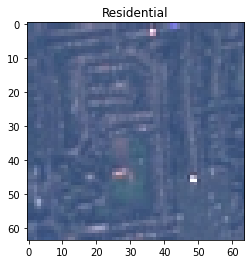

In [16]:
show_random_image(eurosat_train_ds, eurosat_train_ds.classes)

In [17]:
EMNIST_train_ds = torchvision.datasets.EMNIST(root='../data',
                                              split='letters',
                                              train=True,
                                              download=True,
                                              transform=T.ToTensor())

561754112it [00:29, 19120809.61it/s]                                                                                    


Extracting ../data/EMNIST/raw/gzip.zip to ../data/EMNIST/raw


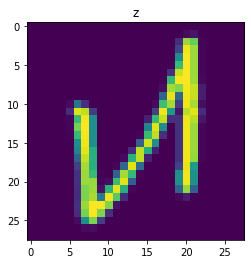

In [21]:
show_random_image(EMNIST_train_ds, EMNIST_train_ds.classes)

In [22]:
get_size(EMNIST_train_ds[9])

{'channels': 1, 'height': 28, 'width': 28}

In [19]:
KMNIST_train_ds = torchvision.datasets.KMNIST(root='../data',
                                              train=True,
                                              transform=T.ToTensor(),
                                              download=True)

18165760it [00:15, 1163669.38it/s]                                                                                      


Extracting ../data/KMNIST/raw/train-images-idx3-ubyte.gz to ../data/KMNIST/raw



29696it [00:00, 198133.50it/s]                                                                                          


Extracting ../data/KMNIST/raw/train-labels-idx1-ubyte.gz to ../data/KMNIST/raw



3041280it [00:02, 1050574.97it/s]                                                                                       


Extracting ../data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/KMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████| 5120/5120 [00:00<00:00, 3087239.29it/s]

Extracting ../data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/KMNIST/raw



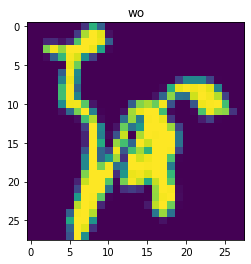

In [23]:
show_random_image(KMNIST_train_ds, KMNIST_train_ds.classes)

In [25]:
get_size(KMNIST_train_ds[9])

{'channels': 1, 'height': 28, 'width': 28}

In [178]:
oxford_pets_train_ds = torchvision.datasets.OxfordIIITPet(root='../data',
                                                          split= 'trainval',
                                                          transform=T.ToTensor(),
                                                          download=True)

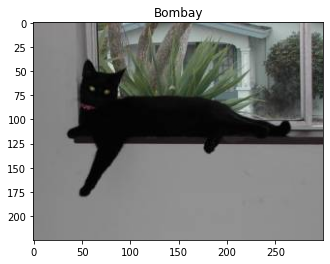

In [191]:
show_random_image(oxford_pets_train_ds, oxford_pets_train_ds.classes)

In [188]:
get_size(oxford_pets_train_ds[3])

{'channels': 3, 'height': 351, 'width': 500}

In [28]:
pcam_train_ds = torchvision.datasets.PCAM(root='../data',
                                          split='train',\
                                          transform=T.ToTensor(),
                                          download=True)

2291it [00:00, 9725860.79it/s]


BadGzipFile: Not a gzipped file (b'<!')

In [ ]:
show_random_image()